# MatDX API tutorial

URL to download an example IPYNB file: https://gitlab.chemdx.org/global-network/mrrs-2022-dec-us/-/tree/master

## Install Mendeleev python library

In [1]:
!pip install mendeleev

Formation energy = E(PtCu2) - (E(Pt) + 2xE(Cu))

# MatDX API command to download dataset about formation energy

In [41]:
import json
import requests
import time

KRICTDB_URL = "https://materials.chemdx.org"
api_command = "/api/download/property"

headers = {}
headers['Content-Type'] = 'application/json'

compositional_arity="Binary"
property_calculation="Formation energy"

api_command += "?compositional_arity=" + compositional_arity
api_command += "&property_calculation=" + property_calculation

## Excute API commad

In [47]:
size = 500

collect = []
for i in range(1,11,1):
    option = json.dumps({
        "from": i,
        "size": size
    })
    response = requests.post(KRICTDB_URL+api_command, data=option, headers=headers).text
    collect += json.loads(response)

    print("Total %d * %d entries"%(i,size))
    time.sleep(1)

Total 1 * 500 entries
Total 2 * 500 entries
Total 3 * 500 entries
Total 4 * 500 entries
Total 5 * 500 entries
Total 6 * 500 entries
Total 7 * 500 entries
Total 8 * 500 entries
Total 9 * 500 entries
Total 10 * 500 entries


## View one of the entries

In [48]:
len(collect)

5000

In [49]:
collect[0]

{'formula': 'Ni4Ta6',
 'space_group': 'R-3c',
 'structure': [{'data': {'a': [-6.910143e-10, 0, 0],
    'b': [3.455072e-10, -5.984361000000001e-10, 0],
    'c': [-3.455072e-10, 1.994788e-10, 3.8393110000000003e-10],
    'atoms': [{'x': -3.45507990183523e-10,
      'y': -1.9947900244761103e-10,
      'z': 7.9504002988613e-11,
      'element': 'Ni'},
     {'x': -6.9101497659279e-10,
      'y': 7.349320005927056e-18,
      'z': 1.1246100950784702e-10,
      'element': 'Ni'},
     {'x': -4.0564010241193595e-18,
      'y': -3.989569981570961e-10,
      'z': 2.71471008087482e-10,
      'element': 'Ni'},
     {'x': -3.4550799589121803e-10,
      'y': -1.99478979769825e-10,
      'z': 3.0442601432568504e-10,
      'element': 'Ni'},
     {'x': -1.9145199616975595e-10,
      'y': -3.989570119487071e-10,
      'z': 9.598300151934901e-11,
      'element': 'Ta'},
     {'x': -5.952883059087111e-10,
      'y': -2.3315500026858307e-10,
      'z': 9.598300151934901e-11,
      'element': 'Ta'},
     {'x'

In [50]:
import csv

with open('MatDX_nomad_EF.csv','w') as f:
    w = csv.writer(f)
    for k, tmp_list in enumerate(collect):
        if k == 0:
            w.writerow(tmp_list.keys())
        w.writerow(tmp_list.values())

## The number of entries for each spacegroup

In [5]:
sp_list = []
for sp in collect: sp_list.append(sp['space_group'])
sp_count_list = [(sp_list.count(sp), sp) for sp in set(sp_list)]
sp_count_list.sort(reverse=True)
sp_count_list[0:11]

[(1234, 'I4/mmm'),
 (854, 'P4/mmm'),
 (705, 'Fm-3m'),
 (660, 'Pm-3m'),
 (551, 'Cmcm'),
 (496, 'R-3m'),
 (377, 'Immm'),
 (361, 'Cmmm'),
 (324, 'P4/nmm'),
 (284, 'P-3m1'),
 (284, 'Fd-3m')]

## Select the Fm-3m spacegroup (FCC structure)

In [6]:
sp_selectd = sp_count_list[2][1]
print(sp_selectd)
sp_count_list_selectd = [entry for entry in collect if entry['space_group'] == sp_selectd]
len(sp_count_list_selectd)

Fm-3m


705

## Extract the entries for Fm-3m space group

In [7]:
flist = [entry['formula']
         for entry in collect if entry['space_group'] == sp_selectd]
len(flist)

705

## Top 5 formulas duplicated in the dataset


In [8]:
nflist = [(flist.count(fi),fi) for fi in set(flist)]
nflist.sort(reverse=True)
nflist[0:5]

[(9, 'SnP'), (6, 'NaBr'), (5, 'Fe3P'), (4, 'PtSr'), (4, 'CuIr')]

## Compare formation energies of various spacegroups

In [9]:
print(nflist[0][1])
for sp in collect:
    if sp['formula'] == nflist[0][1]:
        print(sp['space_group'], sp['formation_energy']['value_per_atom'])

SnP
Fm-3m -0.09479267157576299
Fm-3m -0.09479276658323421
Fm-3m -0.09440152081224173
Fm-3m -0.09479073142317151
Fm-3m -0.09479267157576299
Fm-3m -0.09479276658323421
Fm-3m -0.09440152081224173
Fm-3m -0.09479073142317151
Fm-3m -0.09453313366342808
I4mm -0.17049034385357142
I4mm -0.17049034385357142
F-43m 0.134815296805475
Cmmm 0.28567141145133146
Cmmm 0.2837275035653928


## Collect formation energies of two different compounds

In [10]:
print([nflist[0][1], nflist[1][1]])

x_label = []
en_f = []
i = 1
for sp in collect:
    if (sp['formula'] in [nflist[0][1], nflist[1][1]]) and (sp['space_group'] == sp_selectd):
        x_label.append(str(i)+':'+sp['space_group']+':'+sp['formula'])
        en_f.append(sp['formation_energy']['value_per_atom'])
        i += 1

print(x_label)
print(en_f)

['SnP', 'NaBr']
['1:Fm-3m:SnP', '2:Fm-3m:SnP', '3:Fm-3m:SnP', '4:Fm-3m:SnP', '5:Fm-3m:SnP', '6:Fm-3m:SnP', '7:Fm-3m:SnP', '8:Fm-3m:SnP', '9:Fm-3m:SnP', '10:Fm-3m:NaBr', '11:Fm-3m:NaBr', '12:Fm-3m:NaBr', '13:Fm-3m:NaBr', '14:Fm-3m:NaBr', '15:Fm-3m:NaBr']
[-0.09479267157576299, -0.09479276658323421, -0.09440152081224173, -0.09479073142317151, -0.09479267157576299, -0.09479276658323421, -0.09440152081224173, -0.09479073142317151, -0.09453313366342808, -1.7192765439625828, -1.6432630530960348, -1.6432630530960348, -1.7218775135256053, -1.7218775135256053, -1.641356465645302]


## Plotting the formation energies by using Pandas module

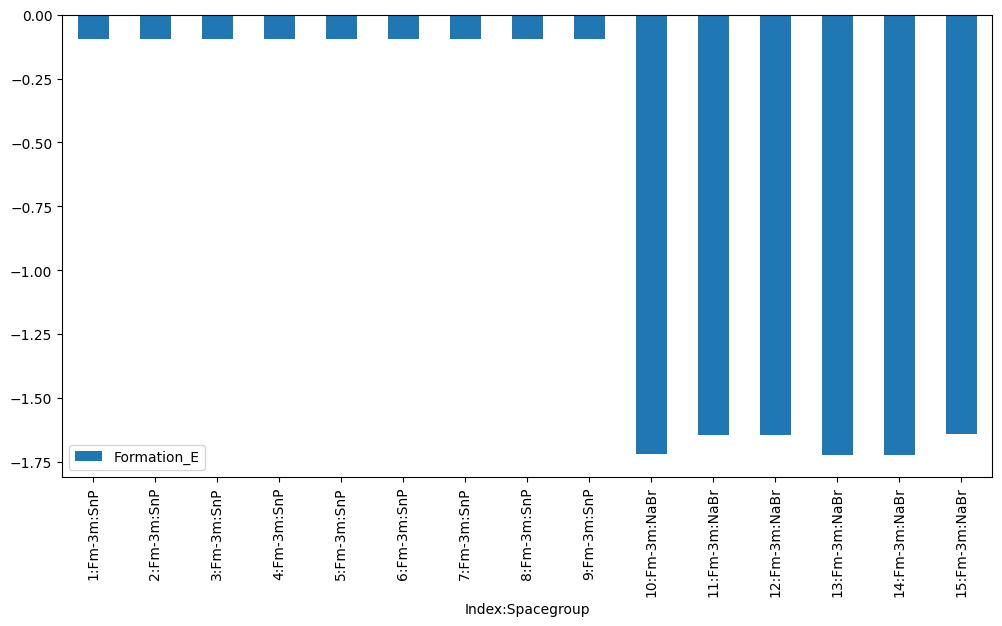

In [11]:
import pandas as pd

df = pd.DataFrame({'Index:Spacegroup': x_label, 'Formation_E': en_f})
df.plot.bar(x='Index:Spacegroup', y='Formation_E', figsize=(12,6))
pass

## Download data of Fm-3m compounds from MatDX

In [12]:
space_group = "Fm-3m"
api_command += "&space_group=" + space_group

size = 1000

collect_org = []
for i in range(1,11,1):
    option = json.dumps({
        "from": i,
        "size": size
    })
    response = requests.post(KRICTDB_URL+api_command, data=option, headers=headers).text

    collect_org += json.loads(response)

    print("Total %d * %d entries"%(i,size))

Total 1 * 1000 entries
Total 2 * 1000 entries
Total 3 * 1000 entries
Total 4 * 1000 entries
Total 5 * 1000 entries
Total 6 * 1000 entries
Total 7 * 1000 entries
Total 8 * 1000 entries
Total 9 * 1000 entries
Total 10 * 1000 entries


In [13]:
print(len(collect))

10000


## Data cleaning: remove compounds which have abnormally high formation energy

In [14]:
collect_clean = []
for i in collect_org:
    if abs(i['formation_energy']['value_per_atom']) > 3: continue
    collect_clean.append(i)
print(len(collect_clean), 'compounds')

collect = collect_clean

print(collect[0]['formula'])

8780 compounds
SnP


## Generate feature set by using mendeleev python module

In [15]:
!pip install mendeleev

In [16]:
import mendeleev

In [17]:
from mendeleev import element

features_list = []
target_list = []

for compound in collect:
    features = []
    elem_list = list(compound['structure'][0]['element'].keys())
    if compound['formula'][0:len(elem_list)] != elem_list[0]:
        elem_list_new = [elem_list[1], elem_list[0]]
        elem_list = elem_list_new

    for name in elem_list:
        count = compound['structure'][0]['element'][name]
        features.append(count)
        features.append(name)
    print(compound['formula'], features)
    break

SnP [1, 'Sn', 1, 'P']


## Information about intrinsic properties of element

In [18]:
element('Sn')

Element(
	abundance_crust=2.3,
 	abundance_sea=4e-06,
 	annotation='',
 	atomic_number=50,
 	atomic_radius=145.0,
 	atomic_radius_rahm=248.0,
 	atomic_volume=16.3,
 	atomic_weight=118.71,
 	atomic_weight_uncertainty=0.007,
 	block='p',
 	c6=659.0,
 	c6_gb=715.0,
 	cas='7440-31-5',
 	covalent_radius_bragg=140.0,
 	covalent_radius_cordero=139.0,
 	covalent_radius_pyykko=140.0,
 	covalent_radius_pyykko_double=130.0,
 	covalent_radius_pyykko_triple=132.0,
 	cpk_color='#ff1493',
 	density=7.287,
 	description='Silvery malleable metallic element belonging to group 14 of the periodic table. Twenty-six isotopes are known, five of which are radioactive. Chemically reactive. Combines directly with chlorine and oxygen and displaces hydrogen from dilute acids.',
 	dipole_polarizability=53.0,
 	dipole_polarizability_unc=6.0,
 	discoverers='Known to the ancients.',
 	discovery_location=None,
 	discovery_year=None,
 	ec=<ElectronicConfiguration(conf="1s2 2s2 2p6 3s2 3p6 4s2 3d10 4p6 4d10 5s2 5p2")>,


## Add atomic radius into the feature set

In [19]:
features_list = []
target_list = []

for compound in collect:
    features = []
    elem_list = list(compound['structure'][0]['element'].keys())
    if compound['formula'][0:len(elem_list)] != elem_list[0]:
        elem_list_new = [elem_list[1], elem_list[0]]
        elem_list = elem_list_new

    for name in elem_list:
        count = compound['structure'][0]['element'][name]
        features.append(count)
        features.append(element(name).atomic_radius)
        features.append(name)
    print(compound['formula'], features)
    break

SnP [1, 145.0, 'Sn', 1, 100.0, 'P']


In [20]:
name
element("Sn").atomic_radius

145.0

## Generate 11 features for all the compounds

In [21]:
feature_name = ['atomic_radius',
                'atomic_volume',
                'atomic_weight_uncertainty',
                'dipole_polarizability',
                'electron_affinity',
                'en_pauling',
                'heat_of_formation',
                'thermal_conductivity',
                'vdw_radius',
                'period',
                'group_id']

import os
import sys

formular_list = []
target_list = []
id_list = []
i = 1

try: os.remove('features.csv')
except FileNotFoundError: pass

f = open('features.csv', 'a')
for compound in collect:
    features = []
    elem_list = list(compound['structure'][0]['element'].keys())

    if compound['formula'][0:len(elem_list)] != elem_list[0]:
        elem_list_new = [elem_list[1], elem_list[0]]
        elem_list = elem_list_new

    if compound['formula'] in formular_list: continue
    else: formular_list.append(compound['formula'])

    for name in elem_list:
        count = compound['structure'][0]['element'][name]
        features.append(count)
        for fn in feature_name: features.append(eval(('element("%s").'%name)+fn))

    features = [0 if f is None else f for f in features]
    line = ','.join(map(str,features)) + '\n'
    f.write(line)

    target_list.append(compound['formation_energy']['value_per_atom'])
    id_list.append(compound['id'])

    print(i, elem_list)

    if i == 200: break
    i += 1

f.close()

1 ['Sn', 'P']
2 ['Ba', 'Ir']
3 ['Cr', 'P']
4 ['Fe', 'Na']
5 ['Fe', 'Na']
6 ['Sn', 'P']
7 ['Cr', 'Nb']
8 ['Fe', 'Pb']
9 ['Ag', 'P']
10 ['Al', 'Cu']
11 ['Ce', 'Ga']
12 ['Ni', 'As']
13 ['Mn', 'W']
14 ['As', 'P']
15 ['Ac', 'Sb']
16 ['Cr', 'Nb']
17 ['Cr', 'Nb']
18 ['Fe', 'Pd']
19 ['As', 'P']
20 ['Fe', 'Pd']
21 ['Ag', 'Ta']
22 ['Fe', 'Th']
23 ['Ac', 'Pa']
24 ['Fe', 'Pb']
25 ['I', 'U']
26 ['Cu', 'Ni']
27 ['Pa', 'Ge']
28 ['Al', 'Cs']
29 ['Au', 'Pb']
30 ['Al', 'Cs']
31 ['Ag', 'As']
32 ['Rb', 'U']
33 ['Au', 'Sr']
34 ['Fe', 'V']
35 ['Rh', 'Ge']
36 ['Pt', 'Yb']
37 ['Fe', 'Bi']
38 ['Cr', 'Ga']
39 ['Fe', 'Pb']
40 ['Ac', 'Yb']
41 ['Fe', 'Pb']
42 ['Al', 'Mo']
43 ['Ba', 'Ir']
44 ['Ir', 'Pd']
45 ['W', 'P']
46 ['Ag', 'Ta']
47 ['In', 'V']
48 ['Na', 'Pt']
49 ['Pb', 'V']
50 ['In', 'Pt']
51 ['Cr', 'P']
52 ['Mo', 'P']
53 ['Np', 'Sb']
54 ['Na', 'Pt']
55 ['Mo', 'P']
56 ['Ca', 'Ni']
57 ['Eu', 'U']
58 ['In', 'Nb']
59 ['Pb', 'Sr']
60 ['Pb', 'Ge']
61 ['Ca', 'Ge']
62 ['Sr', 'I']
63 ['Au', 'U']
64 ['Al', 'K']
65 ['Sb

Exception ignored in: <function _collection_gced at 0x11a032e50>
Traceback (most recent call last):
  File "/Users/suhyunyoo/Research/syoo_research/syoo_personal/lib/python3.9/site-packages/sqlalchemy/event/registry.py", line 103, in _collection_gced
    def _collection_gced(ref: weakref.ref[Any]) -> None:
KeyboardInterrupt: 


KeyboardInterrupt: 

## Download 'target.json' and 'feature.csv' files from the repository

Repository URL: https://gitlab.chemdx.org/global-network/mrrs-2022-dec-us/-/tree/master

## Upload 'target.json' and 'feature.csv' files

In [22]:
with open('target.json', 'r') as f: target_list = json.load(f)
df = pd.read_csv('features.csv', header=None)
from numpy import array
features_list = array(df)

FileNotFoundError: [Errno 2] No such file or directory: 'target.json'

## Machine learning: Linear Regressor

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()
target_list_pred = reg.fit(features_list, target_list).predict(features_list)
r2_score(target_list, target_list_pred)

from sklearn.model_selection import train_test_split

r2_l = []
for i in range(0,10,1):
    print(i)
    features_list = array(features_list)
    X_train, X_test, y_train, y_test = train_test_split(features_list, target_list, test_size=2/10)
    reg = linear_model.LinearRegression()
    reg = reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    r2_l.append(r2_score(y_test, y_test_pred))

array(r2_l).mean()

0
1
2
3
4
5
6
7
8
9


0.1898103713260441

## Machine learning: Decision Tree Regressor

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
target_list_pred = clf.fit(features_list, target_list).predict(features_list)
r2_score(target_list, target_list_pred)

r2_l = []
for i in range(0,10,1):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(features_list, target_list, test_size=2/10)
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    r2_l.append(r2_score(y_test, y_test_pred))

array(r2_l).mean()

0
1
2
3
4
5
6
7
8
9


0.6563730922111449

## Machine learning: Gradient Boost Regressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

r2_l = []
for i in range(0,10,1):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(features_list, target_list, test_size=2/10)
    est = GradientBoostingRegressor()
    est = est.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    r2_l.append(r2_score(y_test, y_test_pred))


array(r2_l).mean()

0
1
2
3
4
5
6
7
8
9


0.9369779591248072